<a href="https://colab.research.google.com/github/YOUGALAKSHMI/Data-Analysis-Visuvalization/blob/main/Final_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#libiraies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
import seaborn as sns

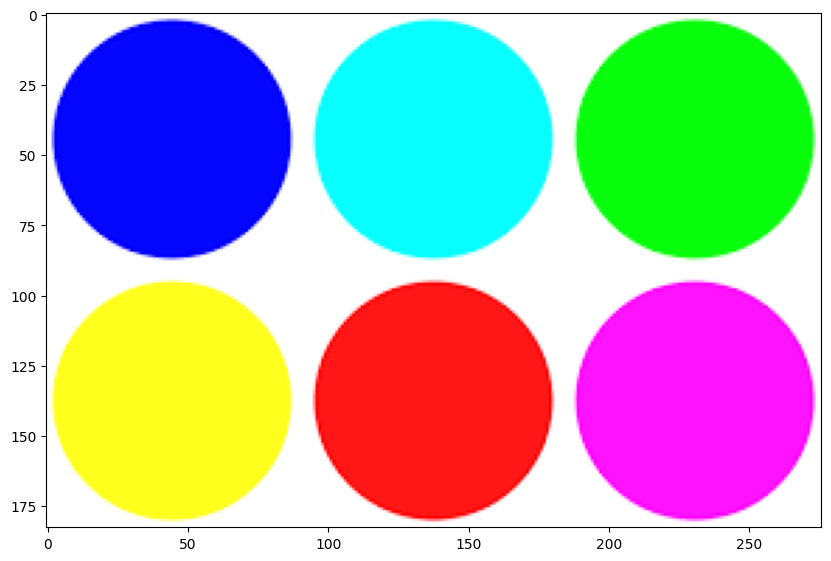

In [ ]:
img=cv2.imread('/content/clor.png')
plt.figure(figsize=(10,8))
plt.imshow(img)

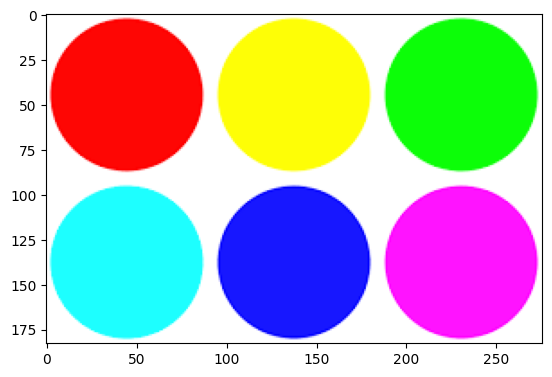

In [ ]:
grid_RGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(grid_RGB)

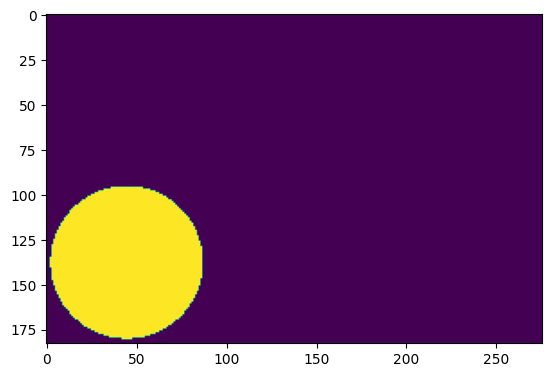

In [ ]:
grid_HSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower=np.array([80,100,100])
upper=np.array([90,255,255])
mask=cv2.inRange(grid_HSV,lower,upper)
plt.imshow(mask)

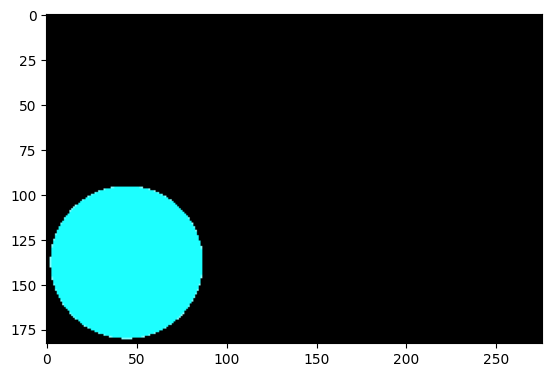

In [ ]:
res=cv2.bitwise_and(grid_RGB,grid_RGB,mask=mask)
plt.imshow(res)

#data preprocessing

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Covid 19 dataset edited 1 (1).csv")

In [ ]:
df


,Date,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
0,30-01-2020,Kerala,1,0,0
1,02-02-2020,Kerala,2,0,0
2,03-02-2020,Kerala,3,0,0
3,02-03-2020,Kerala,3,0,0
4,03-03-2020,Kerala,3,0,0
...,...,...,...,...,...
825,04-12-2020,Tamil Nadu,786163,763428,11747
826,04-12-2020,Kerala,620049,556378,2329
827,05-12-2020,Andhra Pradesh,870675,857233,7020
828,05-12-2020,Tamil Nadu,787554,764854,11762


In [ ]:
df.describe()

,Total Confirmed Cases,Cured/Discharged/Migrated,Death
count,830.000000,830.000000,830.000000
mean,234708.001205,205268.972289,2474.136145
std,292770.888072,275788.046635,3529.675573
min,1.000000,0.000000,0.000000
25%,1703.500000,695.500000,21.000000
50%,51215.000000,29459.500000,326.000000
75%,474572.000000,395222.750000,4568.250000
max,870675.000000,857233.000000,11762.000000


In [ ]:
df.shape

(830, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       830 non-null    object
 1   State                      830 non-null    object
 2   Total Confirmed Cases      830 non-null    int64 
 3   Cured/Discharged/Migrated  830 non-null    int64 
 4   Death                      830 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 32.5+ KB


In [ ]:
df.isnull()

,Date,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
825,False,False,False,False,False
826,False,False,False,False,False
827,False,False,False,False,False
828,False,False,False,False,False


In [ ]:
df.head()

,Date,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
0,30-01-2020,Kerala,1,0,0
1,02-02-2020,Kerala,2,0,0
2,03-02-2020,Kerala,3,0,0
3,02-03-2020,Kerala,3,0,0
4,03-03-2020,Kerala,3,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])


In [ ]:
label_list = ["State"]

for l in label_list:
    label_encoder(l)

In [ ]:
df.head()

,Date,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
0,30-01-2020,1,1,0,0
1,02-02-2020,1,2,0,0
2,03-02-2020,1,3,0,0
3,02-03-2020,1,3,0,0
4,03-03-2020,1,3,0,0


<ipython-input-22-3c94dbebb172>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


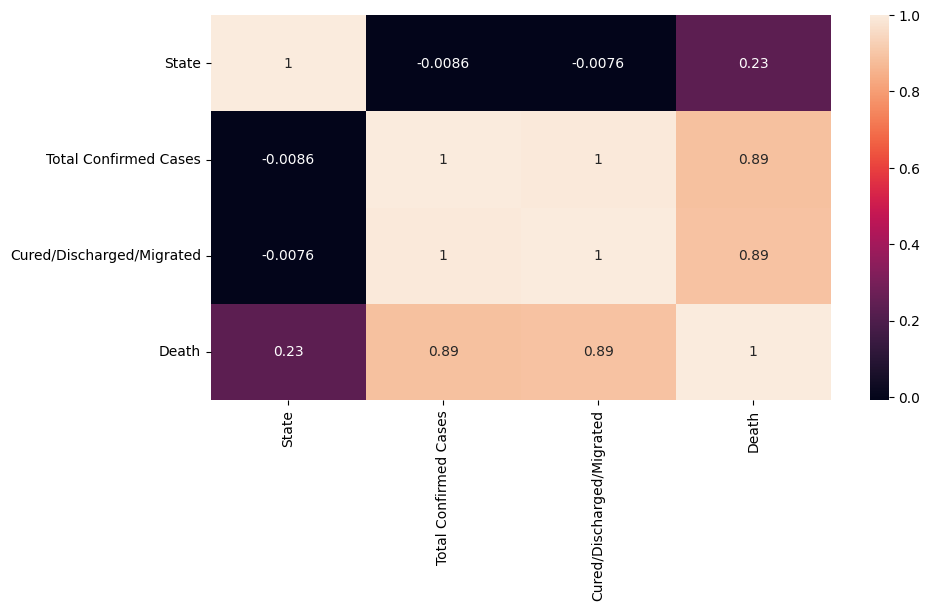

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(),annot=True)

plt.show()

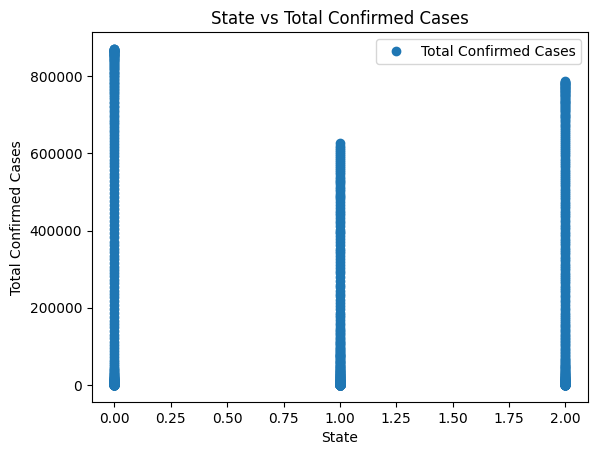

In [ ]:
df.plot(x='State',y='Total Confirmed Cases',style='o')
plt.title('State vs Total Confirmed Cases')
plt.xlabel('State')
plt.ylabel('Total Confirmed Cases')
plt.show()

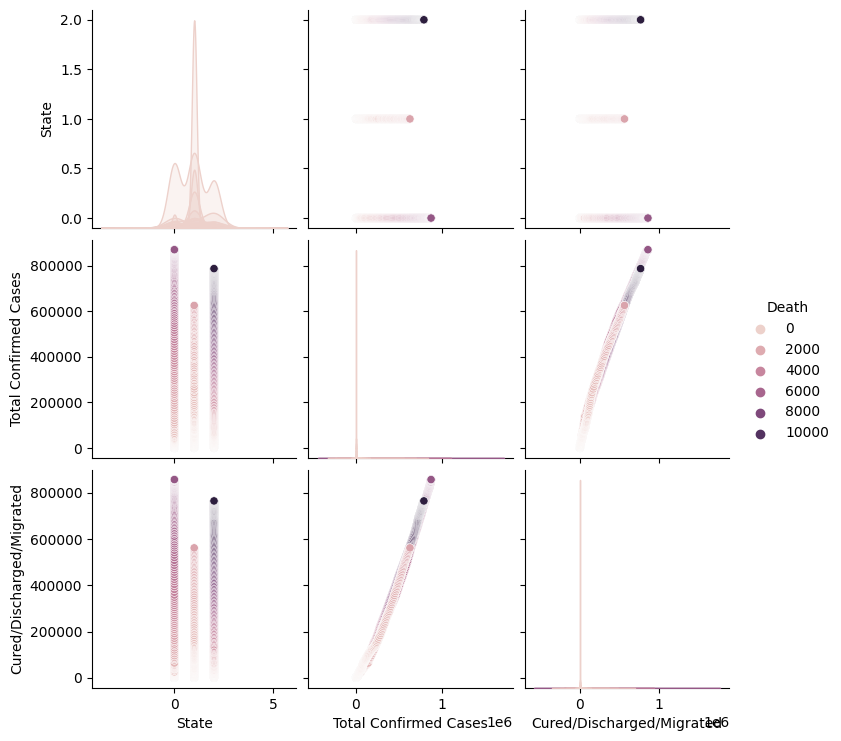

In [ ]:
sns.pairplot(df,hue='Death')

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(["Death","Date"],axis=1)
y = df.Death

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (664, 3)
x_test shape: (166, 3)
y_train shape: (664, 1)
y_test shape: (166, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_test, y_test)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
y_pred

array([[ 4.17148676e+03],
       [-8.14699886e+02],
       [ 9.02436544e+03],
       [ 1.68906428e+02],
       [ 1.96629197e+03],
       [ 2.79907544e+02],
       [-8.10571759e+02],
       [ 6.48970928e+03],
       [ 1.62828936e+03],
       [-8.40609123e+02],
       [ 7.52220434e+03],
       [ 2.84249390e+03],
       [ 3.61107745e+03],
       [-7.91656491e+02],
       [ 7.85058272e+03],
       [ 9.91800579e+03],
       [ 5.15140539e+02],
       [ 6.32783860e+02],
       [ 6.29530025e+03],
       [ 5.46592539e+02],
       [ 1.92882508e+02],
       [ 6.06564152e+03],
       [ 1.18405687e+03],
       [ 2.39583515e+03],
       [ 1.71608083e+02],
       [ 7.25903247e+03],
       [ 1.95042536e+02],
       [-8.38680925e+02],
       [ 1.17651722e+03],
       [ 1.72300513e+02],
       [ 4.72536484e+03],
       [-8.38680925e+02],
       [-8.01679853e+02],
       [ 1.89963549e+03],
       [ 8.71500544e+03],
       [ 1.17632380e+03],
       [ 2.13206381e+03],
       [ 1.80985487e+02],
       [ 1.7

In [ ]:
from sklearn import metrics
print('Mean absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error 1041.4279477448983
Mean squared error 1730113.751098619
Root mean squared error 1315.337884765211


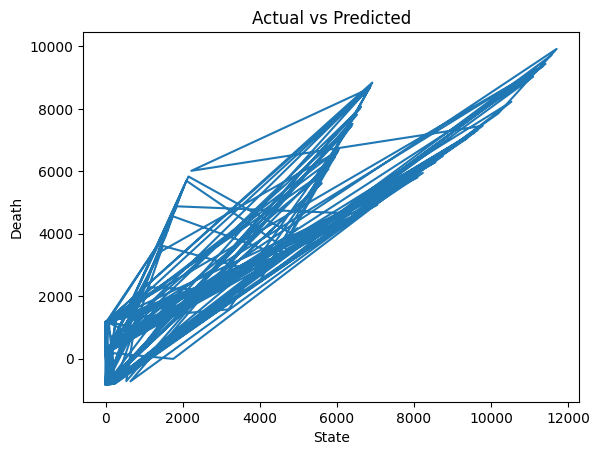

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, y_pred)
plt.title('Actual vs Predicted')
plt.xlabel('State')
plt.ylabel('Death')
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import cv2
import numpy as np
import urllib

image_url="https://img.freepik.com/premium-photo/swirl-pattern-dynamic-colors-line-d-render-design-background_124507-14322.jpg"

response=urllib.request.urlopen(image_url)
image_array=np.asarray(bytearray(response.read()),dtype=np.uint8)
image=cv2.imdecode(image_array,-1)


def on_mouse_click(x, y):
   global image
   cv2.circle(image, (x, y), 10, (0, 255, 0), -1)  # Draw a green circle where clicked
   update_image()

# Create an image widget to display the image
image_widget = widgets.Image(value=cv2.imencode('.png', image)[1].tobytes())

# Create a callback for mouse events
def handle_mouse_click(event):
  x, y = int(event['x']), int(event['y'])
  on_mouse_click(x, y)

# Create an output widget to display the image widget
output = widgets.Output()
with output:
  display(image_widget)

# Create an event listener for mouse clicks
image_widget.on_msg(handle_mouse_click)

# Display the widget
display(output)

Output()

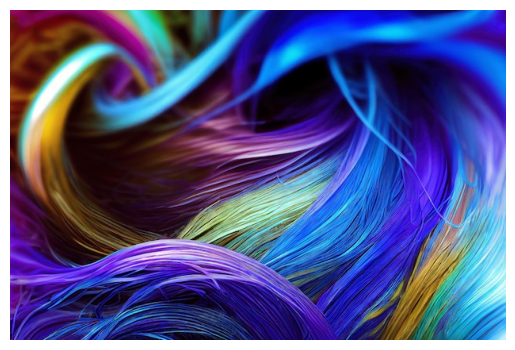

In [ ]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
%%javascript
// Function to handle the double-click event
function handleDoubleClick(event) {
  // Check if it's a double-click event
   if (event.detail === 2) {
     // Capture the x and y positions of the mouse
     const x = event.clientX;
     const y = event.clientY;
     // Print the x and y positions
     console.log("Double-click at X:", x, "Y:", y);
    // You can also perform further actions with x and y here
    }
  }
  // Add a double-click event listener to the document
  document.addEventListener("dblclick", handleDoubleClick);

<IPython.core.display.Javascript object>